In [4]:
# 라이브러리 로드 
import numpy as np
import pandas as pd
from datetime import datetime as dt
from googleapiclient.discovery import build
import os

import warnings # 경고창 무시
warnings.filterwarnings('ignore')

# 시각화 라이브러리
from wordcloud import WordCloud     # 워드클라우드 호출
import matplotlib.pyplot as plt     # 워드클라우드 시각화
import seaborn as sns 
from collections import Counter     # 텍스트 및 빈도수 추출
from konlpy.tag import Okt          # 한국어 형태소 분석 패키지
from PIL import Image               # 워드클라우드 원하는대로 그리기

# font 설정 관련 라이브러리 
import matplotlib.font_manager as fm

font = "./NanumBarunGothicLight.ttf" # ttf가 저장된 경로 
font_family = fm.FontProperties(fname=font).get_name() # 경로 강제 포맷

# 한글폰트
plt.rc("font", family=font_family)

In [1]:
def make_WordCloud(df, column_name):
    global font_family 
    texts = []
    words = []
    Words = []
    okt = Okt()
    for i in range(len(df)):
        texts.append(df['title'][i])

    for text in texts:
        words = okt.pos(text) 
        words_list = [word for word, tag in words if tag in ['Noun','Ajective'] and len(word) > 1] # 단어의 길이가 1개인 것은 제외

        for new_word in words_list: 
            Words.append(new_word)
    print(f'총 {len(Words)} 개의 단어 수집')
    
    c = Counter(nouns_words_list)
    wc = WordCloud(font_path = font_family, width=1000, height=600, scale=2.0, max_font_size=300)
    gen = wc.generate_from_frequencies(c)

    plt.figure(figsize=(20,20)) # 사이즈 조절
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [143]:
# 파일 불러오기 
df_video = pd.read_csv('Youtube_김달_video_20221004_v0.csv', dtype={"itemcode":"object"})
df_comment = pd.read_csv('Youtube_comment_h0fdxOOhs8g_20221004_v0.csv',dtype={"itemcode":"object"})

In [144]:
video_id = df_video.sort_values(by=['comment'],ascending = False,ignore_index=True)['video_id'][0]
video_name = df_video.sort_values(by=['comment'],ascending = False,ignore_index=True)['title'][0]

In [6]:
df_video.head()

,video_id,title,date,view,likecnt,comment,channel_name
0,zf2IsXjCnyY,남자한테는 이렇게 해야 먹힙니다,2022-10-02,148943.0,3416.0,337.0,김달
1,6dXaR-1GyLU,이걸 몰라서 남자에게 끌려다니는 여자들 되게 많습니다,2022-09-25,201872.0,3565.0,286.0,김달
2,0OxSBgfzQv0,남녀 불문하고 애인에게 절대 보여주면 안 되는 친구,2022-09-21,161950.0,2506.0,183.0,김달
3,LgiBq0_g8g0,결혼하고 싶으면 꼭 보세요. 현실에서 이거 알려주는 사람 못 봤습니다,2022-09-18,288989.0,6803.0,661.0,김달
4,t8lYYlZajaw,여자 경험 많은 남자들의 고질적인 습관,2022-09-17,229085.0,4421.0,257.0,김달


In [123]:
df_comment.head()

,comment,author,datetime,like_count
0,제가.. 감히.. 여러분들께.. <br>건방지게 한 말씀 드렸습니다..😢<br><b...,김달,2018-05-08T02:37:11Z,4087
1,존나 탈탈 털려본 사람들은 알거다....이 영상이 사이다란 걸...ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,juseok yang,2019-01-07T13:54:56Z,7017
2,이거 진짜 절절매고 있는 사람들 무조건 봐야되는 영상임 나도 헤어질때 이거 진짜 한...,라이어,2022-09-25T12:57:18Z,3
3,댓글다는 일도 한번 없이 재미로만 보다가 딱 한명 유튜버 방송에 처음으로 비웃지않고...,SH.V J,2021-07-05T16:33:15Z,113
4,김달님 영상중에 이 영상이 진짜 베스트라 생각해요. 연애 관계에서도 그렇고 친구나 ...,큐라소,2021-01-22T13:13:54Z,418


In [15]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     2004 non-null   object
 1   author      2004 non-null   object
 2   datetime    2004 non-null   object
 3   like_count  2004 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.8+ KB


In [91]:
pd.set_option('display.float_format', '{:.1f}'.format)
df_video.describe()

,view,likecnt,comment,year,month
count,790.0,790.0,790.0,790.0,790.0
mean,387532.4,4964.2,502.0,2019.4,6.6
std,386760.1,4766.5,466.0,1.2,3.4
min,25840.0,327.0,0.0,2016.0,1.0
25%,154006.2,2083.5,239.2,2018.0,4.0
50%,268428.0,3634.5,369.5,2019.0,7.0
75%,479303.2,6280.8,609.5,2020.0,9.8
max,4089577.0,52026.0,4729.0,2022.0,12.0


In [17]:
df_video['date'] =  pd.to_datetime(df_video["date"])

df_video["year"] = df_video["date"].dt.year
df_video["month"] = df_video["date"].dt.month

In [46]:
df_sum_by_time = df_video.groupby(['year','month']).sum()
df_mean_by_time = df_video.groupby(['year','month']).mean()

<AxesSubplot:xlabel='year', ylabel='count'>

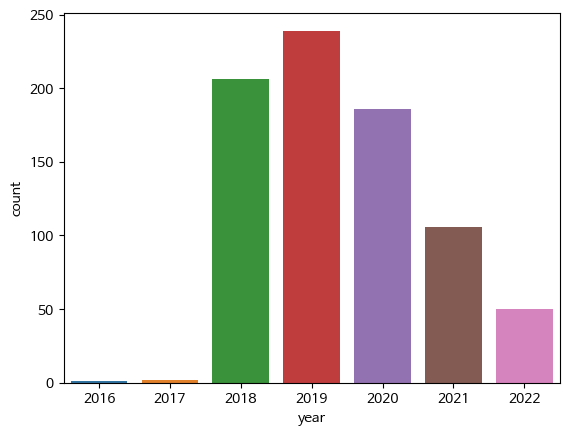

In [54]:
sns.countplot(data = df_video, x="year")

In [63]:
def make_ym(datetime):
    year = str(datetime.year)
    month = datetime.month 
    if month < 10:
        month = '0'+str(month)
    return year + '-' + str(month)

df_video['year_month'] = df_video['date'].apply(make_ym) 
df_video

,video_id,title,date,view,likecnt,comment,channel_name,year,month,year_month
0,zf2IsXjCnyY,남자한테는 이렇게 해야 먹힙니다,2022-10-02,148943.0,3416.0,337.0,김달,2022,10,2022-10
1,6dXaR-1GyLU,이걸 몰라서 남자에게 끌려다니는 여자들 되게 많습니다,2022-09-25,201872.0,3565.0,286.0,김달,2022,9,2022-09
2,0OxSBgfzQv0,남녀 불문하고 애인에게 절대 보여주면 안 되는 친구,2022-09-21,161950.0,2506.0,183.0,김달,2022,9,2022-09
3,LgiBq0_g8g0,결혼하고 싶으면 꼭 보세요. 현실에서 이거 알려주는 사람 못 봤습니다,2022-09-18,288989.0,6803.0,661.0,김달,2022,9,2022-09
4,t8lYYlZajaw,여자 경험 많은 남자들의 고질적인 습관,2022-09-17,229085.0,4421.0,257.0,김달,2022,9,2022-09
...,...,...,...,...,...,...,...,...,...,...
785,pHT9W4c-E-0,나를 사랑해주는 사람을 만나봐요.,2018-01-18,236294.0,2517.0,295.0,김달,2018,1,2018-01
786,RSx6jBcTmmg,상대방보다 본인을 더 사랑할 줄 아는 사람이 되세요.,2018-01-15,191795.0,4430.0,254.0,김달,2018,1,2018-01
787,XCh7mOqJgH4,"남사친, 여사친 때문에 싸우는 커플들이 꼭 봐야하는 영상 (feat. 남녀가 친구가...",2017-12-29,328383.0,4117.0,544.0,김달,2017,12,2017-12
788,Q0FHoitpLnA,집에서 혼자 머리자르는 방법 (ft.상의탈의),2017-12-09,42054.0,369.0,45.0,김달,2017,12,2017-12


<AxesSubplot:xlabel='year_month', ylabel='count'>

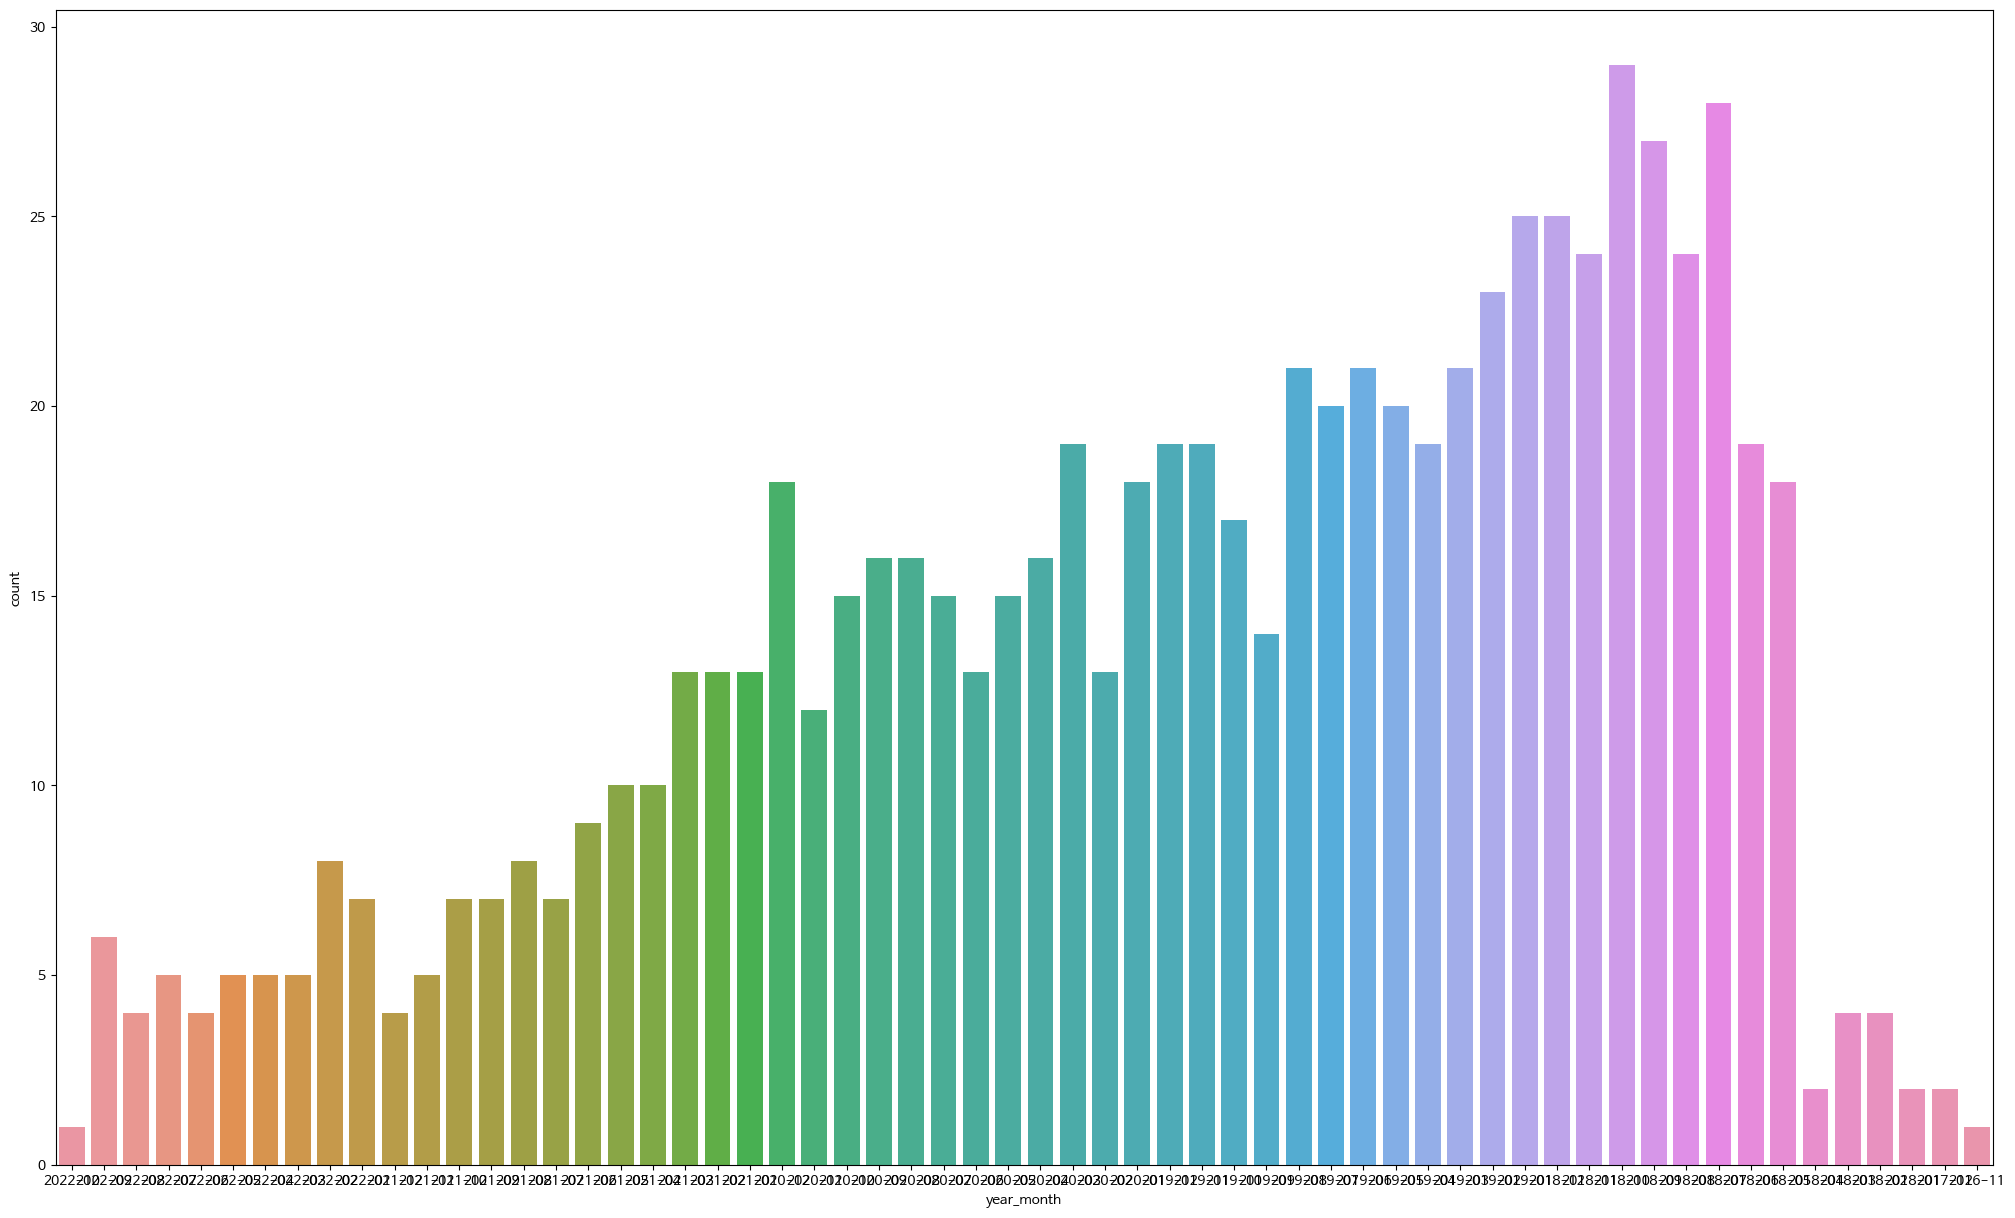

In [82]:
fig, ax = plt.subplots(figsize=(25,15))
sns.countplot(data = df_video, x="year_month")

<AxesSubplot:xlabel='month', ylabel='view'>

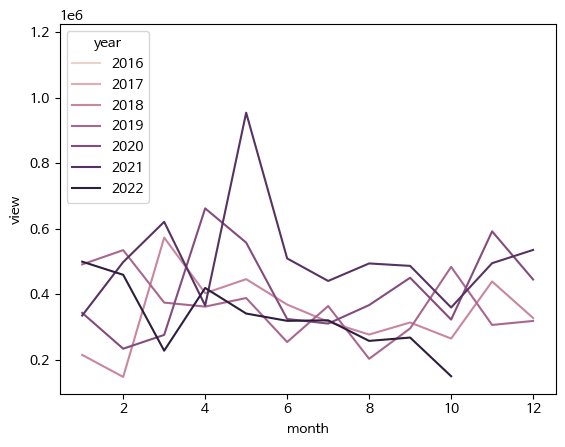

In [53]:
sns.lineplot(data=df_mean_by_time , x="month", y="view",hue='year')

[Text(0.5, 1.0, '월별 좋아요 수')]

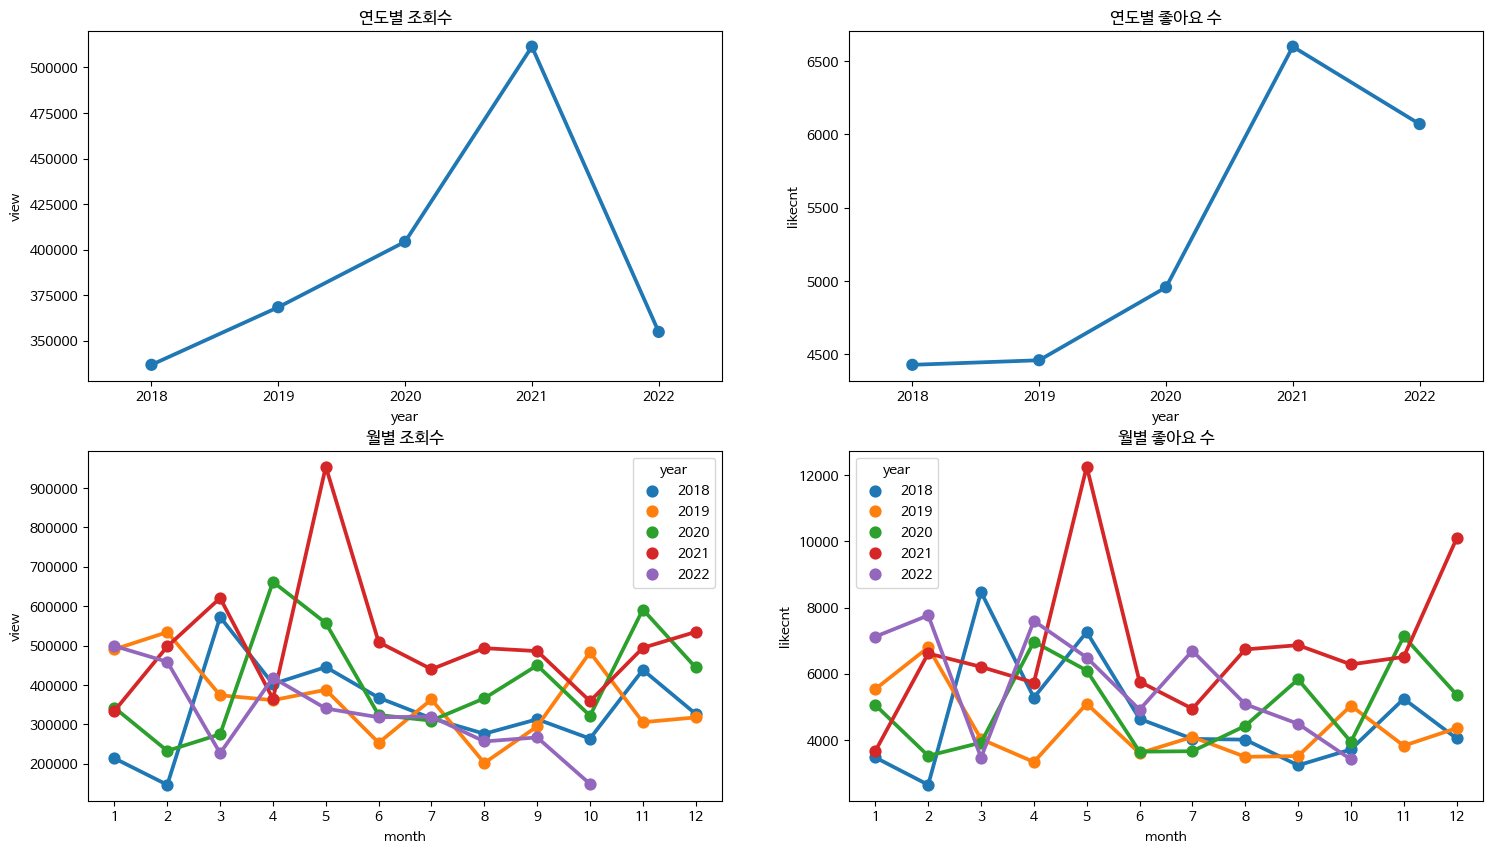

In [96]:
df_view = df_video[df_video['year'] > 2017]
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18,10)

sns.pointplot(data=df_view, x="year", y="view", ax=axes[0][0], ci=None)
sns.pointplot(data=df_view, x="year", y="likecnt", ax=axes[0][1], ci = None)
sns.pointplot(data=df_view, x="month", y="view", hue = 'year', ax=axes[1][0], ci = None)
sns.pointplot(data=df_view, x="month", y="likecnt",hue = 'year', ax=axes[1][1], ci = None)


axes[0][0].set(title = '연도별 조회수')
axes[0][1].set(title = '연도별 좋아요 수')
axes[1][0].set(title = '월별 조회수')
axes[1][1].set(title = '월별 좋아요 수')


In [98]:
df_video_sort = df_video.sort_values(by=['view','likecnt'],ascending = False,ignore_index=True)
df_video_sort[:10]

,video_id,title,date,view,likecnt,comment,channel_name,year,month,year_month
0,k7hgQRGcRgU,(JPN SUB) 내가 좋아하는 사람이 나를 좋아하게 만드는 방법,2019-02-02,4089577.0,52026.0,3648.0,김달,2019,2,2019-02
1,cVknzlmtJzw,(JPN SUB) 모르는 이성과 눈이 마주친다면 절대 피하지 마세요,2019-03-26,3175562.0,19426.0,3609.0,김달,2019,3,2019-03
2,y15Oqq1FfLY,(JPN SUB) 상대방의 진심을 알 수 있는 최고의 방법,2018-11-17,2753603.0,35067.0,1849.0,김달,2018,11,2018-11
3,h0fdxOOhs8g,(JPN SUB) '쓰레기' 처럼 연애하세요. 맺고 끊음이 쉬워질 때 까지.,2018-05-08,2499719.0,44556.0,4729.0,김달,2018,5,2018-05
4,HurKG7AgG-0,사랑받는 여자가 되기 위해 꼭 알아야 할 한 가지,2019-01-19,2420603.0,21621.0,2049.0,김달,2019,1,2019-01
5,-vIByGjQxh8,"이 중에 하나라도 해당된다면, 그 관계는 꼭 다시 생각하세요",2021-05-08,1984477.0,31634.0,1882.0,김달,2021,5,2021-05
6,oM4rz53ql_g,(JPN SUB) 10명 중 9명의 남자는 이런 여자에게 매력을 느낀다,2020-04-07,1918097.0,18800.0,1089.0,김달,2020,4,2020-04
7,K_SbKEfUA70,좋은 남자를 구별할 수 있는 5가지 방법,2020-04-14,1896769.0,22799.0,1462.0,김달,2020,4,2020-04
8,3LiWpbwZxoY,100% 확신할 수 있는 남자들의 호감 신호,2021-05-30,1801516.0,18059.0,1136.0,김달,2021,5,2021-05
9,xsuY0rC2Dvs,옷을 입고 있어도 여자의 몸매가 어떨지 알 수 있는 두 가지 방법,2021-03-07,1743206.0,12885.0,4600.0,김달,2021,3,2021-03


In [103]:
df_video_sort = df_video_sort[df_video_sort['view']> df_video_sort['view'].mean()]

In [107]:
# 이미지 추가
#(2555,2575)는 사진 크기, (255,255,255)는 색상 
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(2555,2275), (255,255,255)) 
image = Image.open('heart.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

In [131]:
def make_WordCloud(df, column_name):
    texts = []
    words = []
    Words = []
    okt = Okt()
    for i in range(len(df)):
        texts.append(df[column_name][i])

    for text in texts:
        words = okt.pos(text) 
        words_list = [word for word, tag in words if tag in ['Noun','Ajective'] and len(word) > 1] # 단어의 길이가 1개인 것은 제외

        for new_word in words_list: 
            Words.append(new_word)
    print(f'총 {len(Words)} 개의 단어 수집')
    
    c = Counter(Words)
    font = 'C:/Windows/Fonts/NanumBarunGothicLight.ttf' #한글 폰트 반환

    wc = WordCloud(font_path = font ,width=1000, height=600, scale=2.0, max_font_size=300)
    gen = wc.generate_from_frequencies(c)

    plt.figure(figsize=(20,20)) # 사이즈 조절
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

총 820 개의 단어 수집


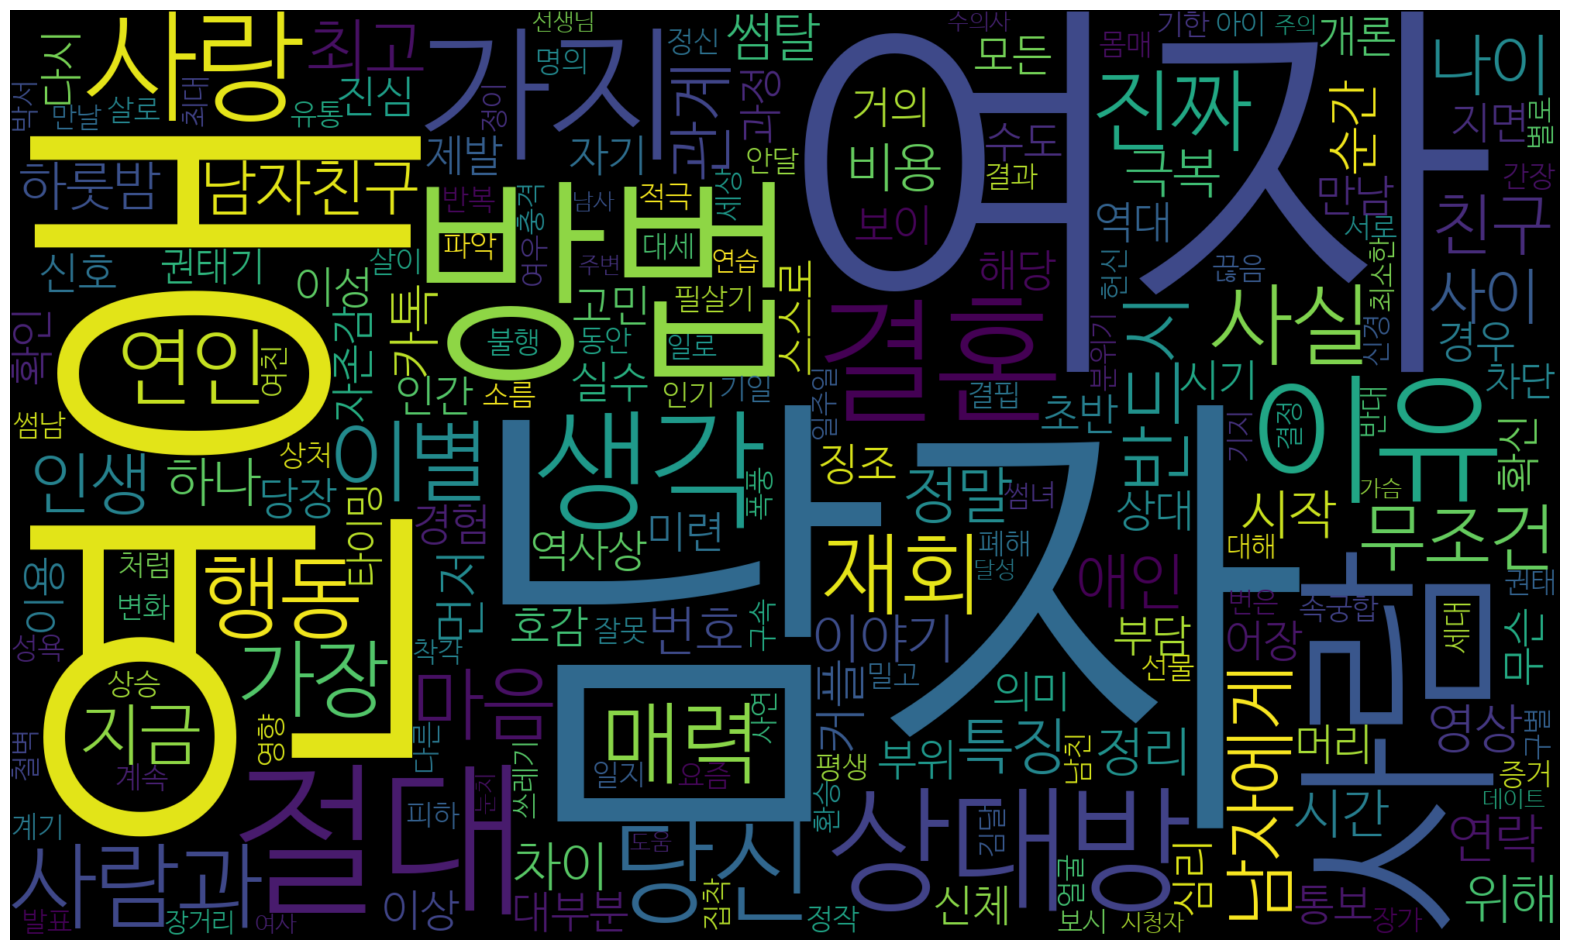

In [119]:
make_WordCloud(df_video_sort , 'title')

In [ ]:
make_WordCloud(df_video_sort , 'title')

In [160]:
df_comment['like_count'] = df_comment['like_count'].astype(float)

In [167]:
df_cmt = df_comment.sort_values(by=['like_count'],ascending=False, ignore_index=True) 
df_cmt = df_cmt[df_cmt['like_count'] > 1000]
df_cmt

,comment,author,datetime,like_count
0,존나 탈탈 털려본 사람들은 알거다....이 영상이 사이다란 걸...ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,juseok yang,2019-01-07T13:54:56Z,7017.0
1,이거 7개월 전에 보고 개소리야 하고 넘겼다가 딱 좆돼서 왔어요 ㅎ 다시 보니까 씹공ㅇ감,윤동신,2019-02-20T07:16:32Z,4811.0
2,그냥 안 맞는 사람은 내쳐야됨<br>인간의 직감은 생각보다 높은 확률로 정확함<br...,박근호,2019-05-24T22:14:32Z,4341.0
3,제가.. 감히.. 여러분들께.. <br>건방지게 한 말씀 드렸습니다..😢<br><b...,김달,2018-05-08T02:37:11Z,4087.0
4,전 남자구요. 여자분들 남자가연락 안된다? 바로 헤어지세요,고티카,2018-12-30T15:27:38Z,3404.0
5,완전 공감. 특히 여자분들 정땜에 참으면서 연애하지 마세요. 나중에 어렵게 헤어지게...,consistency,2018-05-08T03:29:25Z,3356.0
6,ㅋㅋ<br>그냥만나지마 얘들아<br>운동이나하자ㅋㅋ<br>연애할 시간에 돈벌자ㅋㅋ,아에오우,2019-08-25T19:48:21Z,3304.0
7,그리고 상대에게 절대 올인하지마세요.. 상대가 내 전부라고 생각하지마세요 그렇게되면...,혜혜,2018-07-03T09:42:45Z,3146.0
8,내가 끌려다니는 연애를 하고 있다는 느낌이 드는 순간 부터 놓아 주는 연습을 해야한...,mh m,2019-07-27T04:51:19Z,2625.0
9,그래서 티비랑 소파 왜 같이있는건데..,개미똥꼬발랄,2019-12-19T14:21:00Z,2452.0


총 251 개의 단어 수집


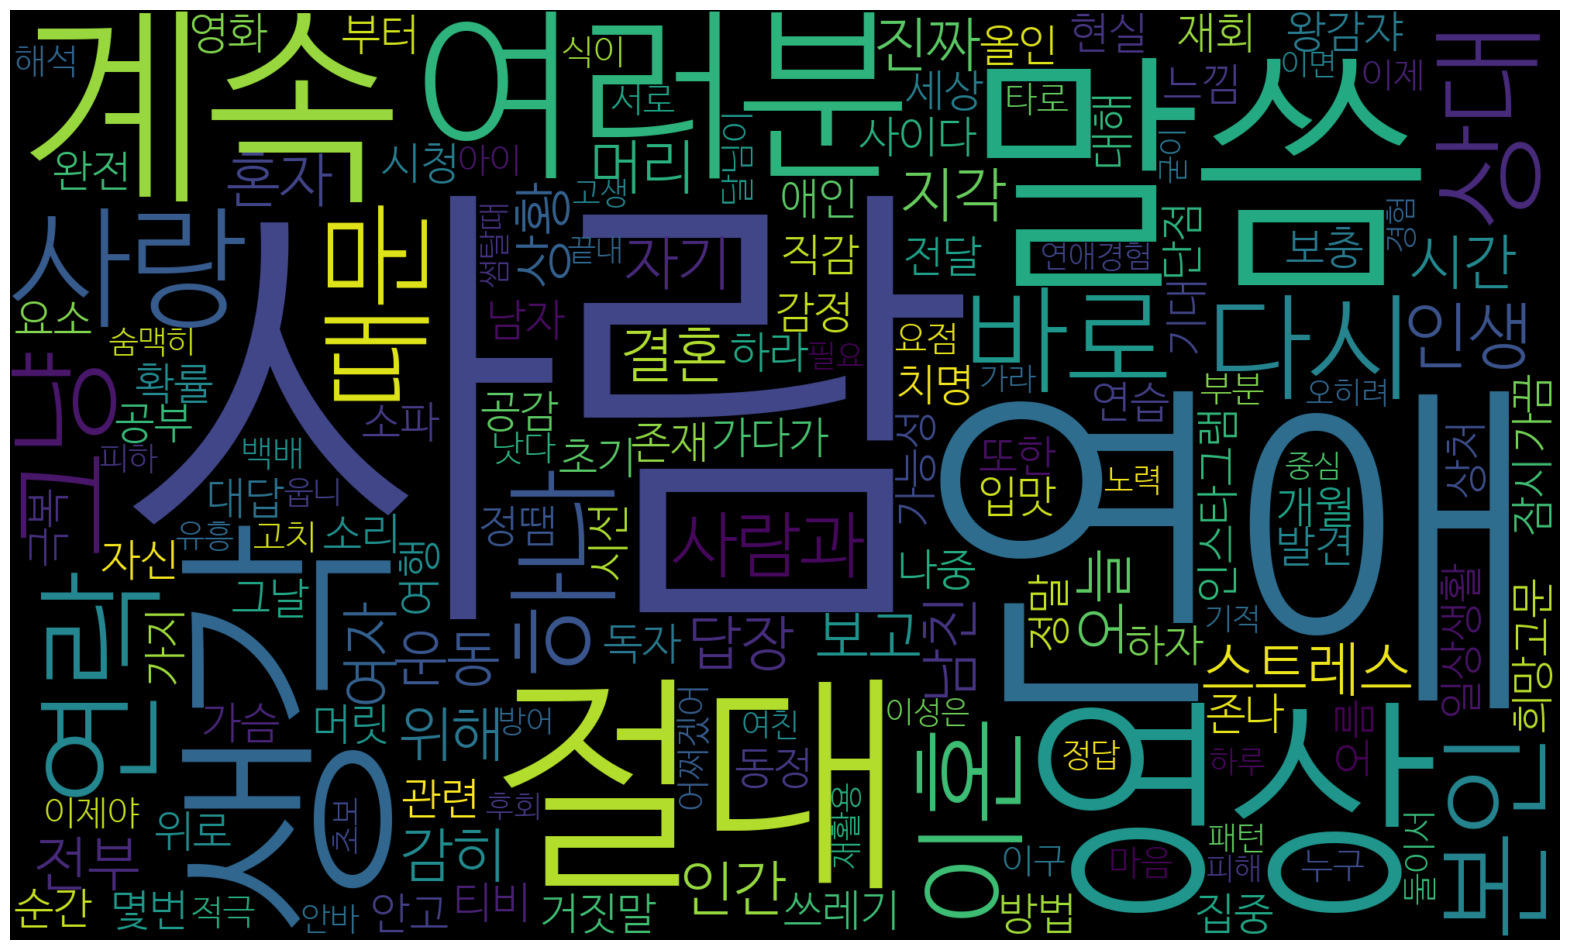

In [163]:
make_WordCloud(df_cmt , 'comment')